# Using the dataset class

Here examples are given how to use the dataset class (in bfdataset.py) which generated many of the test data sets used in explaining and also testing k-means-u and k-means-u*

<p>

<img src="img/flatdata.png" alt="Drawing" style="width: 210px;" align="left"/>

<img src="img/gaussgrid.png" alt="Drawing" style="width: 210px;" align="left"/>
<img src="img/gaussmix.png" alt="Drawing" style="width: 210px;" align="left"/>
<img src="img/paperdata.png" alt="Drawing" style="width: 210px;" align="left"/>
</p>

The dataset class provides:
## data set generators
### 2-dimensional grid of grids (like data set $A$ from the k-means-u paper)
  * Example: dataset.grid(so=6,si=6,grid1=1,grid2=1)
  
### 1-dimensional grid of grids
  * dataset.grid1D(g=5,si=10)
  
### 2-dimensional Gaussian Mixture distribution
  * Example: dataset.gaussmix(n=1000,g=20,sig=0.0003)
  
### n-dimensional Gaussian Mixture distribution
  * dataset.gaussmixXD(n=2000,d=5,g=50,sig=0.0003)
  
## seedings
### random initialization of k vectors from the dataset

### k-means++ initialiation of k vectors from the dataset
* Example: dataset.kmeansplusplusInit(20)

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
imgdir=os.path.join('img')
libdir=os.path.join('..','lib')
module_path = os.path.abspath(libdir)
if module_path not in sys.path:
    sys.path.append(module_path)

In [3]:
#%matplotlib notebook
%matplotlib inline
from sklearn.cluster import KMeans
from scipy.spatial import Voronoi, voronoi_plot_2d
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt
import copy
import warnings
import math
import random
# bfdataset is a class to generate artificial data sets, e.g. grid distributions
from bfdataset import dataset
# bfutil contains helper functions which are not needed in this file
from bfutil import plot3, errorOf, eqlim, noticks, finish, whoami, makeplot, dplot
# kmeansu contains an enriched implementation of k-means-u which gathers statistics
# during training for figure generation
# we do not import it since we use the bare-bones implementation
from kmeansu import getMap
warnings.filterwarnings('ignore')

### general function to plot a data set

In [4]:
def show_data(D,figsize=(7,7), equalAxes=True, **kwargs):
    X=D.getData()
    k= 10
   
    fig,axs = makeplot(1,1,figsize=figsize ) 
    plot3(ax=axs,X=X, **kwargs)
    finish(fig,whoami())
    if equalAxes:
        eqlim(axs,unitpad=0.05)
    return fig

## data set $A$ from them k-means-u* paper: a grid of grids
so = outer sidelength $\rightarrow$ number of clusters = $so*so$ <br>
si = inner sidelength $\rightarrow$ points in a cluster = $si*si$<br>
grid1: indicates if clusters should be arranged in a grid (if 0 then uniform random)<br>
grid2: indicates if points within a cluster should be arranged in a grid (if 0 then Gaussian with std dev $\sigma$, parameter sig) 

Number of points: 1296


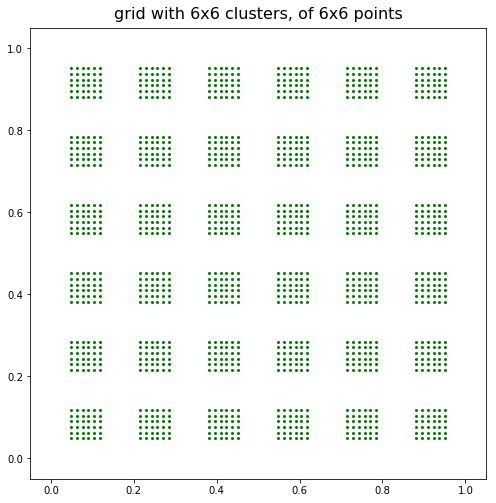

In [5]:
D = dataset.grid(so=6,si=6,grid1=1,grid2=1)
show_data(D,cap="grid with 6x6 clusters, of 6x6 points", dotsize=4, ticks=1);
print("Number of points:", D.n)

## smaller grid of grids #1


Number of points: 400
first 5 points:
[[ 0.1375  0.1375]
 [ 0.1375  0.1625]
 [ 0.1375  0.1875]
 [ 0.1375  0.2125]
 [ 0.1375  0.2375]]


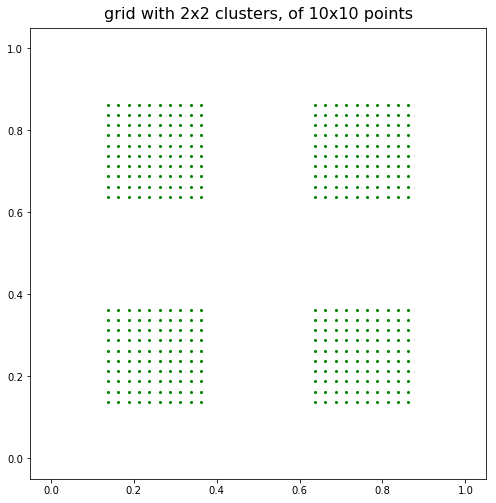

In [6]:
D = dataset.grid(so=2,si=10,grid1=1,grid2=1)
show_data(D,cap="grid with 2x2 clusters, of 10x10 points", figsize=(7,7), dotsize=4, ticks=1);
print("Number of points:", D.n)
print("first 5 points:")
print(D.getData()[:5])

## grid of gaussians

Number of points: 1296


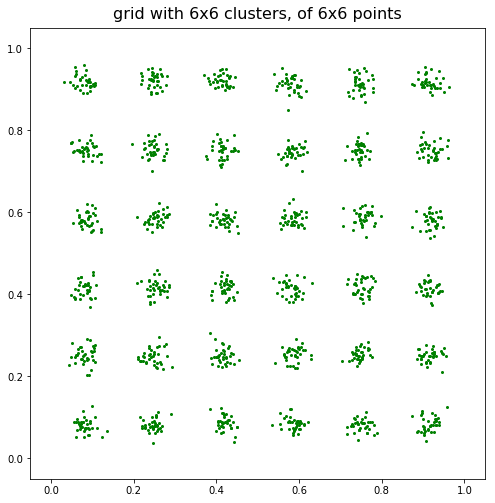

In [7]:
D = dataset.grid(so=6,si=6,grid1=1,grid2=0,sig=0.0003)
fig=show_data(D,cap="grid with 6x6 clusters, of 6x6 points", dotsize=4, ticks=1)
#fig=show_data(D,cap=None, dotsize=4, ticks=0);
print("Number of points:", D.n)
#fig.savefig("img/gaussgrid.png",bbox_inches='tight', dpi=100)

## random arrangement of 36 grid-shaped clusters

Number of points: 1296


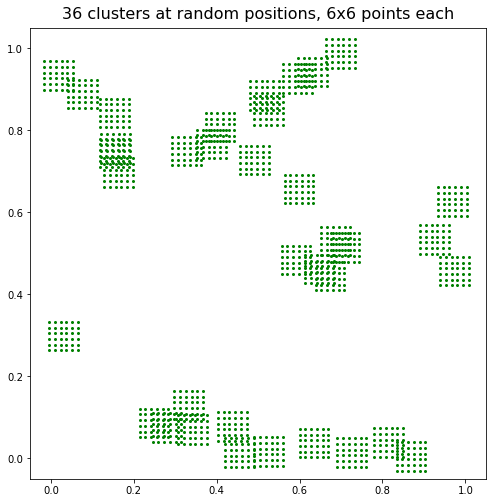

In [8]:
D = dataset.grid(so=6,si=6,grid1=0,grid2=1,sig=0.0003)
show_data(D,cap="36 clusters at random positions, 6x6 points each", dotsize=4, ticks=1);
print("Number of points:", D.n)

## grid of small grids
parameter relsize (default 0.5) indicates which fraction of each dimension should be covered by clusters<br>
relsize=1.0 lets all clusters form one large cluster, small values of relsize form isolated clusters

Number of points: 1296


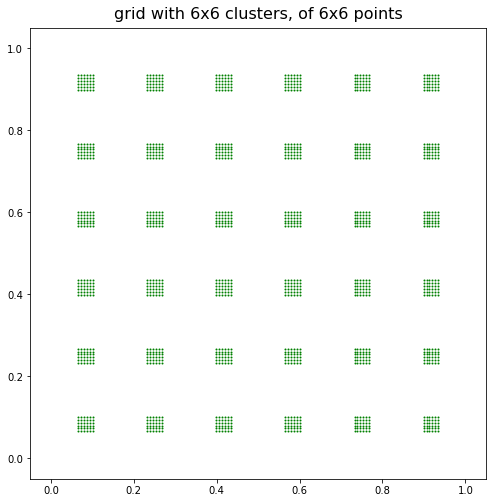

In [9]:
D = dataset.grid(so=6,si=6,grid1=1,grid2=1, relsize=0.25)
show_data(D,cap="grid with 6x6 clusters, of 6x6 points", dotsize=2, ticks=1);
print("Number of points:", D.n)

## grid of large grids
parameter relsize (default 0.5) indicates which fraction of each dimension should be covered by clusters<br>
relsize=1.0 lets all clusters form one large cluster, small values of relsize form isolated clusters

Number of points: 1296


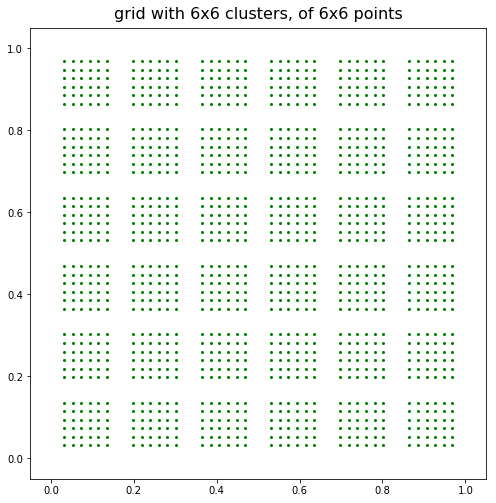

In [10]:
D = dataset.grid(so=6,si=6,grid1=1,grid2=1, relsize=0.75)
show_data(D,cap="grid with 6x6 clusters, of 6x6 points", dotsize=4, ticks=1);
print("Number of points:", D.n)

## Gaussian mixture distribution
parameter relsize (default 0.5) indicates which fraction of each dimension should be covered by clusters<br>
relsize=1.0 lets all clusters form one large cluster, small values of relsize form isolated clusters

Number of points: 3000


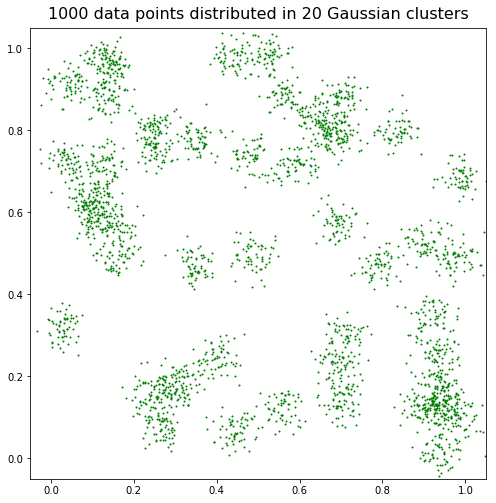

In [11]:
D = dataset.gaussmix(n=3000,g=50,sig=0.0007)
fig=show_data(D,cap="1000 data points distributed in 20 Gaussian clusters", dotsize=2, ticks=1)
#fig=show_data(D,cap=None, dotsize=2, ticks=0);
print("Number of points:", D.n)
#fig.savefig("img/gaussmix.png",bbox_inches='tight', dpi=100)
#print(D.getData())

## 5D mixture of 50 Gaussians
The plot shows all 25 combinations of 2 axes

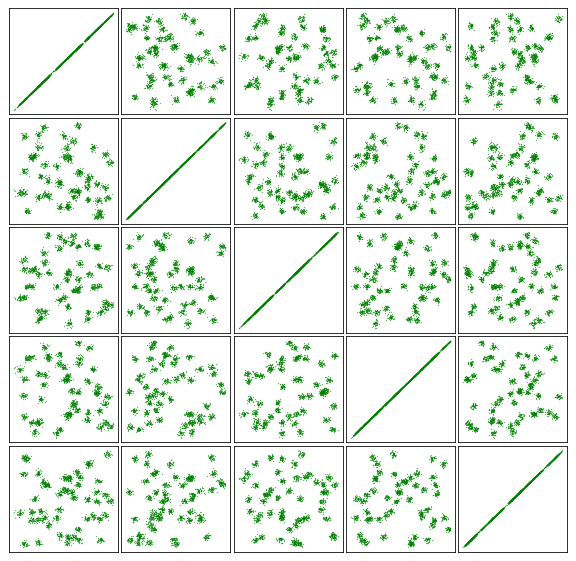

In [12]:
def fig_gaussiandata():
    D=dataset.gaussmixXD(n=2000,d=5,g=50,sig=0.0003)
    a=D.getData()
    fig=dplot(a,ticks=False,size=10)
    return fig
figg = fig_gaussiandata()

# 1D Grid
parameter relsize (default 0.5) indicates which fraction of each dimension should be covered by clusters<br>
relsize=1.0 lets all clusters form one large cluster, small values of relsize form isolated clusters

Number of points: 50


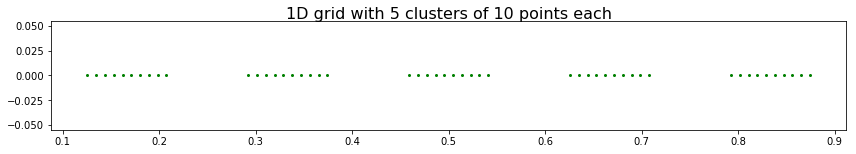

In [13]:
D = dataset.grid1D(g=5,si=10)
show_data(D,cap="1D grid with 5 clusters of 10 points each", dotsize=4, ticks=1, figsize=(12,2), equalAxes=False);
#print(D.getData())
print("Number of points:", D.n)

## mini 1D dataset example (2D points are returned, but second coordinate always 0

In [14]:
D =dataset.grid1D(g=3, si=2,ratio=1)
print(D.getData())
D.kmeansplusplusInit()
D.ibook # size: g*ratio

[[ 0.22222222  0.        ]
 [ 0.27777778  0.        ]
 [ 0.47222222  0.        ]
 [ 0.52777778  0.        ]
 [ 0.72222222  0.        ]
 [ 0.77777778  0.        ]]


array([[ 0.27777778,  0.        ],
       [ 0.72222222,  0.        ],
       [ 0.52777778,  0.        ]])

## Gaussian mixture distribution and k-means++ seeding of $k$ centers
The dataset class has also a built-in implementation of k-means++ seeding in order to show the seeding before k-means starts (the scipy implementation seems to not offer this)

Number of points: 1000


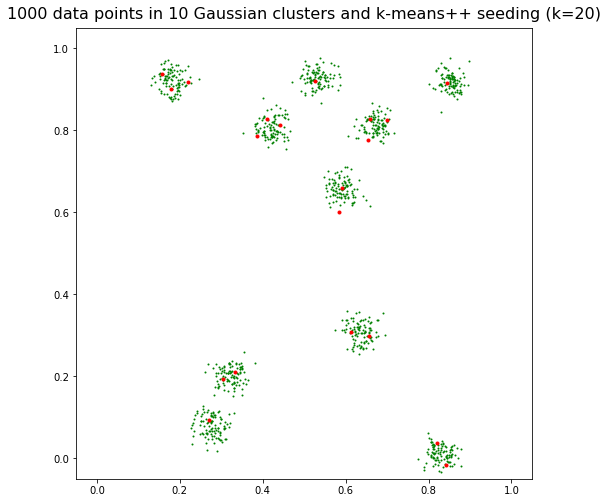

In [15]:
D = dataset.gaussmix(n=1000,g=10,sig=0.0005)
D.kmeansplusplusInit(20) # parameter is the k for k-means
show_data(D,cap="1000 data points in 10 Gaussian clusters and k-means++ seeding (k=20)", dotsize=2, ticks=1,C=D.ibook);
print("Number of points:", D.n)

## Grid distribution and random seeding of $k$ centers


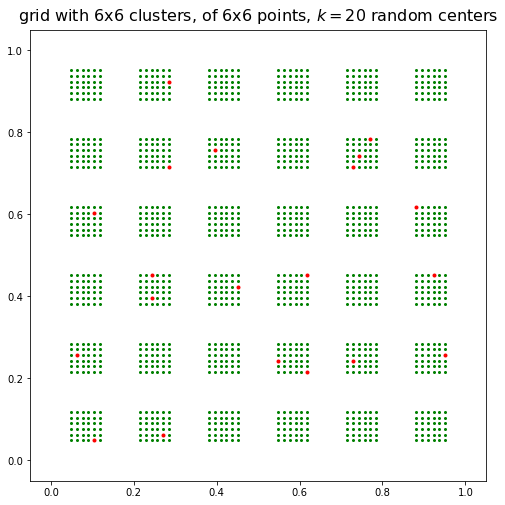

In [16]:
D = dataset.grid(so=6,si=6,grid1=1,grid2=1)
D.randomInit(20) # parameter is the k for k-means
show_data(D,cap="grid with 6x6 clusters, of 6x6 points, $k=20$ random centers",C=D.ibook, dotsize=4, ticks=1);